# CPS 803 / CP 8318 Assignment 2
## CPS 803 [30 Marks]
## CP 8318 [36 Marks]

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


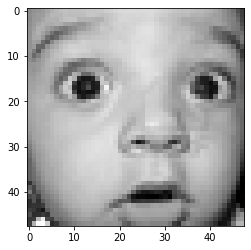

facial emotion: surprise


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

(12045, 48, 48)
(12045,)
(1548, 48, 48)
(1548,)


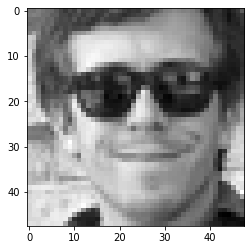

facial emotion: happy


In [22]:
# YOUR CODE HERE
y1d_training = np.argmax(y_training, axis=1)
ybin_training = y1d_training[(y1d_training == 3) | (y1d_training == 4)]
y1d_testing = np.argmax(y_testing, axis=1)
ybin_testing = y1d_testing[(y1d_testing == 3) | (y1d_testing == 4)]
xbin_training = np.zeros((ybin_training.shape[0], 48, 48))
xbin_testing = np.zeros((ybin_testing.shape[0], 48, 48))

#Sample happy or sad faces from training data
binaryindex = 0
count = 0
for i in x_training:
    emote = get_emotion(y_training[binaryindex, :])
    if emote == "happy" or emote == "sad":
        xbin_training[count, :] = i
        count += 1
    binaryindex += 1

#Sample happy or sad faces from testing data
binaryindex = 0
count = 0
for i in x_testing:
    emote = get_emotion(y_testing[binaryindex, :])
    if emote == "happy" or emote == "sad":
        xbin_testing[count, :] = i
        count += 1
    binaryindex += 1

print(xbin_training.shape)
print(ybin_training.shape)
print(xbin_testing.shape)
print(ybin_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = xbin_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(ybin_training[[sampleindex]]))

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

PCA: 


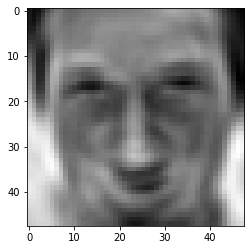

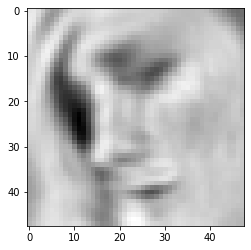

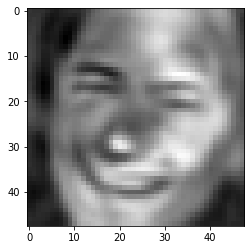

LDA: 


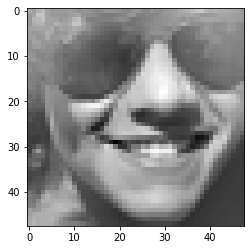

predicted facial emotion: sad


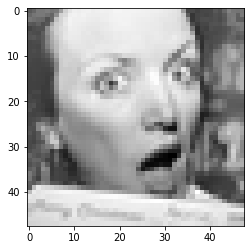

predicted facial emotion: happy


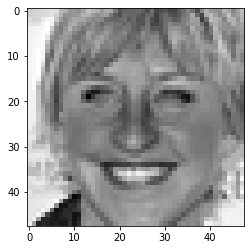

predicted facial emotion: happy


In [50]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Convert data to two-dimensional array for scaling and fitting
x2d_training = xbin_training.reshape(xbin_training.shape[0], 48 * 48)
x2d_testing = xbin_testing.reshape(xbin_testing.shape[0], 48 * 48)

#Standardize data
sc = StandardScaler()
sc.fit(x2d_training)
x2d_training = sc.transform(x2d_training)
x2d_testing = sc.transform(x2d_testing)

#PCA compression retaining 200 componennts.
pcabin = PCA(n_components=200)
pcabin.fit(x2d_training)
xpca_training = pcabin.transform(x2d_training)
xpca_testing = pcabin.transform(x2d_testing)

reduced = pcabin.inverse_transform(xpca_training)

randindex = np.random.randint(0,1000, 3)
PCAsample1 = reduced[randindex[0], :]
PCAsample1 = PCAsample1.reshape(48, 48)
PCAsample2 = reduced[randindex[1], :]
PCAsample2 = PCAsample2.reshape(48, 48)
PCAsample3 = reduced[randindex[2], :]
PCAsample3 = PCAsample3.reshape(48, 48)

print("PCA: ")
plt.imshow(PCAsample1, cmap='gray')
plt.show()
plt.imshow(PCAsample2, cmap='gray')
plt.show()
plt.imshow(PCAsample3, cmap='gray')
plt.show()

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
#Reduces number of data features from 2304 to 6 (can't exceed number of classes)
xlda_training = lda.fit_transform(x2d_training, ybin_training)
xlda_testing = lda.transform(x2d_testing)
ylda_predict = lda.predict(x2d_testing)
LDAsample1 = x2d_testing[randindex[0], :]
LDAsample1 = LDAsample1.reshape(48,48)
LDAsample2 = x2d_testing[randindex[1], :]
LDAsample2 = LDAsample2.reshape(48,48)
LDAsample3 = x2d_testing[randindex[2], :]
LDAsample3 = LDAsample3.reshape(48,48)
print("LDA: ")
plt.imshow(LDAsample1, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[0]]]))
plt.imshow(LDAsample2, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[1]]]))
plt.imshow(LDAsample3, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[2]]]))

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

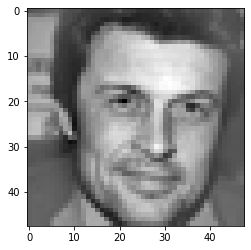

predicted facial emotion: happy
Naive Bayes binary classification accuracy: 0.582687338501292


In [24]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

#Using pca reduced data to improve compute time (runs fast regardless but keeping consistent with other classifiers)
nb.fit(xpca_training, ybin_training)

ybin_predict = nb.predict(xpca_testing)

bayesindex = np.random.randint(0,1000)
bayessample = x2d_testing[bayesindex, :]
bayessample = bayessample.reshape(48, 48)
plt.imshow(bayessample, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ybin_predict[[bayesindex]]))

print("Naive Bayes binary classification accuracy: " + str(accuracy_score(ybin_testing, ybin_predict)))

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

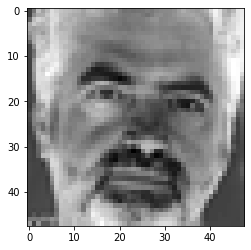

predicted facial emotion: happy
Logistic Regression binary classification accuracy: 0.7131782945736435


In [25]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver="liblinear")

#Using pca reduced data to improve compute time
logreg.fit(xpca_training, ybin_training)

ybin_predict = logreg.predict(xpca_testing)

logindex = np.random.randint(0,1000)
logsample = x2d_testing[logindex, :]
logsample = logsample.reshape(48, 48)

plt.imshow(logsample, cmap='gray')
plt.show()

print('predicted facial emotion: %s' % get_emotion(ybin_predict[[logindex]]))

print("Logistic Regression binary classification accuracy: " + str(accuracy_score(ybin_testing, ybin_predict)))

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

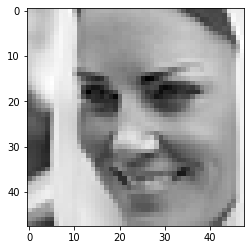

predicted facial emotion: happy
Support Vector Machine binary classification accuracy: 0.7680878552971576


In [53]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(C=4.1, gamma='scale', tol=0.05)

#Using pca reduced data to improve compute time
svm.fit(xpca_training, ybin_training)

ybin_predict = svm.predict(xpca_testing)

svmindex = np.random.randint(0,1000)
svmsample = x2d_testing[svmindex, :]
svmsample = svmsample.reshape(48,48)

plt.imshow(svmsample, cmap='gray')
plt.show()

print('predicted facial emotion: %s' % get_emotion(ybin_predict[[svmindex]]))

print("Support Vector Machine binary classification accuracy: " + str(accuracy_score(ybin_testing, ybin_predict)))

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

The most trustworthy approach for binary classification of happiness and sadness is support vector machines. Naive bayes has a fast computatation time but is not very reliable with an accuracy of 58%, which is close to a coin flip. Logistic regression runs slower but still fairly fast and has a decent accuracy of roughly 70%. However, the most reliable is support vector machine at an accuracy of 77%, however without dimensionality reduction on training data, the time complexity can get very high. Overall, SVMs are the most reliable method for this problem.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

Happiest faces:


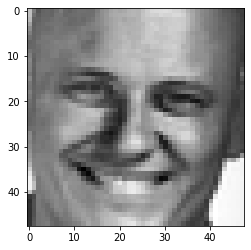

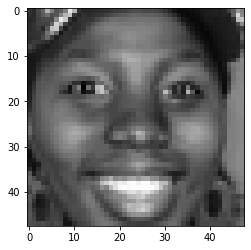

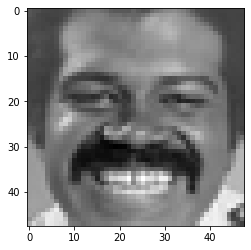

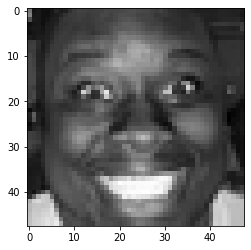

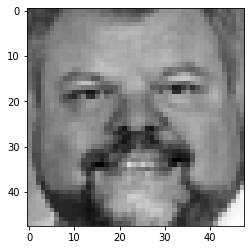

Saddest faces:


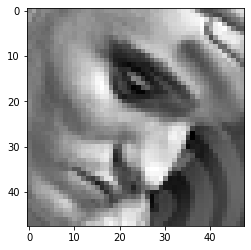

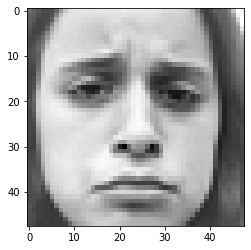

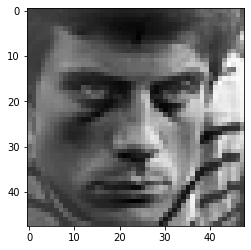

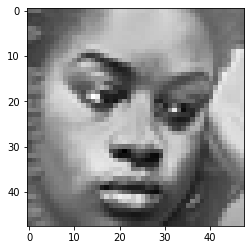

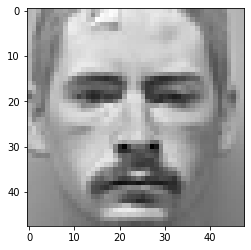

In [54]:
# YOUR CODE HERE
#Find distances from hyperplane for each data point and story in array
distance = svm.decision_function(xpca_training)

#Find 5 highest positive (saddest faces) and lowest negative (happiest faces) distances to hyperplane and store their indices
happysamples = distance.argsort()[:5]
sadsamples = distance.argsort()[-5:]

#Display happiest faces
print('Happiest faces:')
for ind in happysamples:
    hapsample = x2d_training[ind, :]
    hapsample = hapsample.reshape(48,48)
    plt.imshow(hapsample, cmap='gray')
    plt.show()

#Display saddest faces
print('Saddest faces:')
for ind in sadsamples:
    sadsample = x2d_training[ind, :]
    sadsample = sadsample.reshape(48,48)
    plt.imshow(sadsample, cmap='gray')
    plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

PCA: 


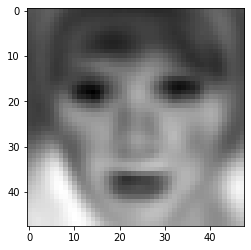

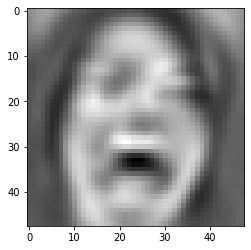

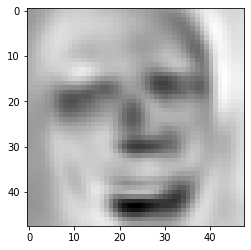

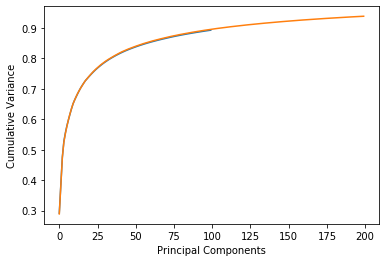

Curves are identical.
LDA: 


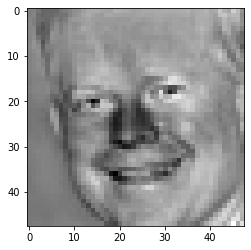

predicted facial emotion: angry


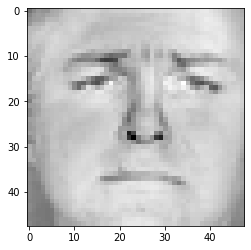

predicted facial emotion: happy


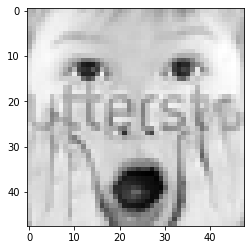

predicted facial emotion: surprise


In [32]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Convert data to two-dimensional array for scaling
x2d_training = x_training.reshape(x_training.shape[0], 48 * 48)
x2d_testing = x_testing.reshape(x_testing.shape[0], 48 * 48)

#Standardize data
sc = StandardScaler()
sc.fit(x2d_training)
x2d_training = sc.transform(x2d_training)
x2d_testing = sc.transform(x2d_testing)

#PCA compression retaining 100 componennts.
pca = PCA(n_components=100)
pca.fit(x2d_training)
xpca_training = pca.transform(x2d_training)
xpca_testing = pca.transform(x2d_testing)

reduced = pca.inverse_transform(xpca_training)

randindex = np.random.randint(0,1000, 3)
PCAsample1 = reduced[randindex[0], :]
PCAsample1 = PCAsample1.reshape(48, 48)
PCAsample2 = reduced[randindex[1], :]
PCAsample2 = PCAsample2.reshape(48, 48)
PCAsample3 = reduced[randindex[2], :]
PCAsample3 = PCAsample3.reshape(48, 48)

print("PCA: ")
plt.imshow(PCAsample1, cmap='gray')
plt.show()
plt.imshow(PCAsample2, cmap='gray')
plt.show()
plt.imshow(PCAsample3, cmap='gray')
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pcabin.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance")
plt.show()
print("Curves are identical.")

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
#Reduces number of data features from 2304 to 6 (can't exceed number of classes)
xlda_training = lda.fit_transform(x2d_training, y1d_training)
xlda_testing = lda.transform(x2d_testing)
ylda_predict = lda.predict(x2d_testing)
LDAsample1 = x2d_testing[randindex[0], :]
LDAsample1 = LDAsample1.reshape(48,48)
LDAsample2 = x2d_testing[randindex[1], :]
LDAsample2 = LDAsample2.reshape(48,48)
LDAsample3 = x2d_testing[randindex[2], :]
LDAsample3 = LDAsample3.reshape(48,48)
print("LDA: ")
plt.imshow(LDAsample1, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[0]]]))
plt.imshow(LDAsample2, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[1]]]))
plt.imshow(LDAsample3, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ylda_predict[[randindex[2]]]))

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

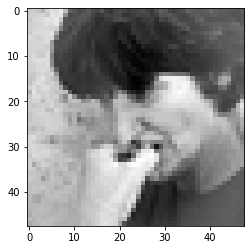

predicted facial emotion: sad
Naive Bayes classification accuracy: 0.3443856227361382


In [41]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

#Using pca reduced data to improve compute time (runs fast regardless but keeping consistent with other classifiers)
nb.fit(xpca_training, y1d_training)

ynb_predict = nb.predict(xpca_testing)

bayesindex = np.random.randint(0,1000)
bayessample = x2d_testing[bayesindex, :]
bayessample = bayessample.reshape(48, 48)
plt.imshow(bayessample, cmap='gray')
plt.show()
print('predicted facial emotion: %s' % get_emotion(ynb_predict[[bayesindex]]))

print("Naive Bayes classification accuracy: " + str(accuracy_score(y1d_testing, ynb_predict)))

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Naive bayes is inherently multi-class, so it tries to label all classes regardless of any data imbalance. However, a large majority of images are being classified with the wrong emotion, except for happy images. For six out of seven classes, the classification accuracy is under 50%, making naive bayes a poor classifier for this multi-class problem.

In [42]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y1d_testing, ynb_predict)
print(confmatrix)

[[ 83   9  53 129  61  28 104]
 [  7  12   1  18   6   3   9]
 [ 35  12  87 124  83  52 103]
 [ 70  10  81 517  93  34  90]
 [ 50  21  56 185 146  25 170]
 [ 24   8  48  77  34 171  53]
 [ 49  12  57 151  89  29 220]]


[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

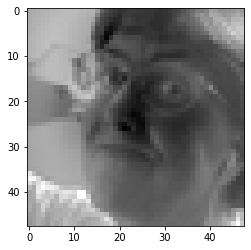

predicted facial emotion: sad
Logistic Regression classification accuracy: 0.38896628587350235


In [43]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver="liblinear", multi_class="auto")

#Using pca reduced data to improve compute time
logreg.fit(xpca_training, y1d_training)

ylogreg_predict = logreg.predict(xpca_testing)

logindex = np.random.randint(0,1000)
logsample = x2d_testing[logindex, :]
logsample = logsample.reshape(48, 48)

plt.imshow(logsample, cmap='gray')
plt.show()

print('predicted facial emotion: %s' % get_emotion(ylogreg_predict[[logindex]]))

print("Logistic Regression classification accuracy: " + str(accuracy_score(y1d_testing, ylogreg_predict)))

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Logistic regression is a one-vs-all classifier, so it classifies each class as positive against all other classes as negative. The classifier leads to more accurate results than naive bayes, but not by a lot as some emotions are still labeled incorrectly over half the time, and classes with less data are not predicted well. This can be seen by how there are no images labeled by disgust, since we are dealing with an imbalanced data set with a small amount of images labeled by disgust.

In [44]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

confmatrix = confusion_matrix(y1d_testing, ylogreg_predict)
print(confmatrix)

[[ 45   0  29 202  74  41  76]
 [  3   0  11  23   9   1   9]
 [ 33   0  55 171  81  54 102]
 [ 23   0  28 664  85  29  66]
 [ 53   0  31 202 211  26 130]
 [ 15   0  25  77  44 204  50]
 [ 26   0  23 201  94  46 217]]


[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

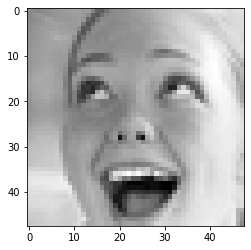

predicted facial emotion: surprise
Support Vector Machine binary classification accuracy: 0.481471161883533
[[153   1  48 101  82  15  67]
 [  5  12   9  11  13   0   6]
 [ 61   0 157  83  86  36  73]
 [ 52   0  47 622  74  16  84]
 [ 63   0  60 136 267  16 111]
 [ 21   1  41  46  19 247  40]
 [ 48   0  43 119 102  25 270]]


In [45]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

svm = SVC(C=4.1, gamma='scale', tol=0.05)

#Using pca reduced data to improve compute time (still takes while to run)
svm.fit(xpca_training, y1d_training)

ysvm_predict = svm.predict(xpca_testing)

svmindex = np.random.randint(0,1000)
svmsample = x2d_testing[svmindex, :]
svmsample = svmsample.reshape(48,48)

plt.imshow(svmsample, cmap='gray')
plt.show()

print('predicted facial emotion: %s' % get_emotion(ysvm_predict[[svmindex]]))

print("Support Vector Machine binary classification accuracy: " + str(accuracy_score(y1d_testing, ysvm_predict)))

confmatrix = confusion_matrix(y1d_testing, ysvm_predict)
print(confmatrix)

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

This support vector machine is a one-vs-one classifier meaning that the classifier trains each pair of classes separately, instead of training one class against all the others. This helps deal with the problem of imbalanced data sets ignoring classes with less data, which can be seen in the confusion matrix as some faces are labeled with disgust. SVM is also the most accurate of the used classifiers at making predictions for multi-class data, but is much more computationally expensive.

[2 Marks] e. Which categories of faces seem to be most similar or least similar?

Similarity of face categories can be seen by observing the results of the confusion matrix. Using the confusion matrix for SVM, since it yields the most accurate results, shows that sad faces are often mislabeled as happy or neutral so they are the most  simlar. Similarity between happy and neutral can also be seen from the last row of neutral classifications. Also, angry and fear are similar to happy and sad. There is very minimal similarity between surprise and the other categories, making it the least similar category. Fear and anger also do not have a strong similarity, but surprise still stands out the most. While other categories are not classified as disgust, the disgust category is often confused with other cateogories, though this could be due to an insufficient amount of data.

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

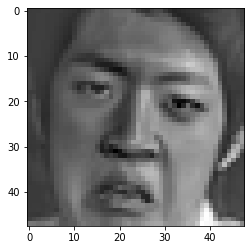

facial emotion: disgust


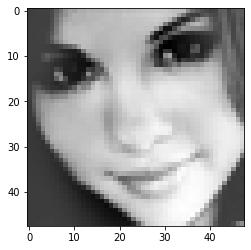

facial emotion: happy


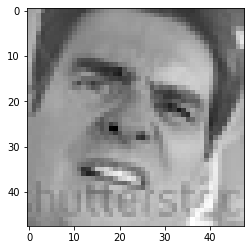

facial emotion: disgust


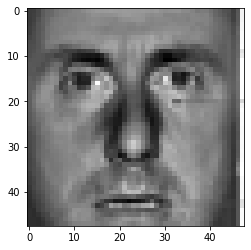

facial emotion: surprise


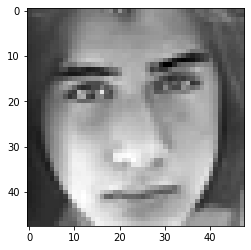

facial emotion: neutral


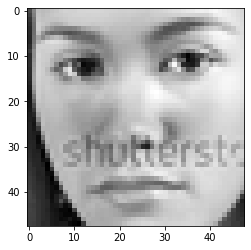

facial emotion: sad


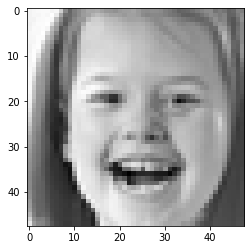

facial emotion: happy


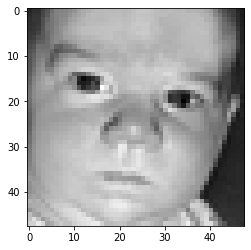

facial emotion: disgust


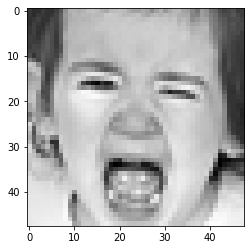

facial emotion: sad


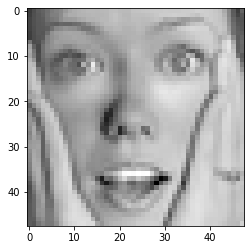

facial emotion: surprise
Solution 2:


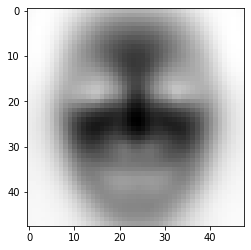

facial emotion: angry


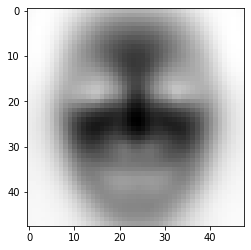

facial emotion: sad


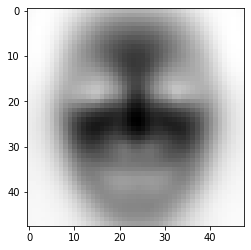

facial emotion: angry


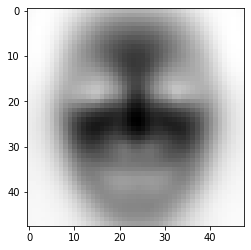

facial emotion: happy


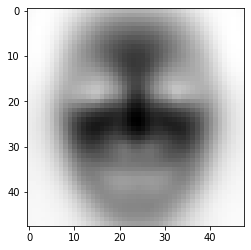

facial emotion: angry


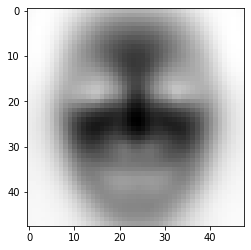

facial emotion: angry


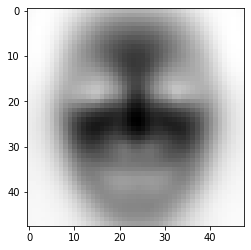

facial emotion: angry


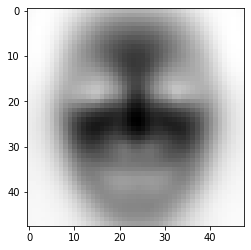

facial emotion: angry


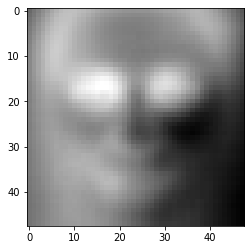

facial emotion: fear


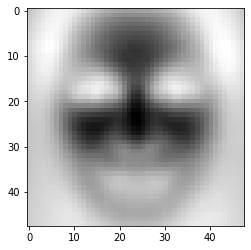

facial emotion: neutral


In [48]:
# YOUR CODE HERE
#Solution 1: Find values closest to hyperplane (less distance means less certainity of which class image belongs to)
#Since this is a multi-class problem, there are multiple hyperplanes so 2d array is returned. closest values are found and
#then the array is looped through to find the original indices for each potential mislabeled image.

dist = svm.decision_function(xpca_training)
absdist = np.abs(dist)
smallestdist = np.sort(absdist, axis=None)[:10]
rows = absdist.shape[0]
cols = absdist.shape[1]
for x in range(0,rows):
    for y in range(0,cols):
        if absdist[x][y] in smallestdist:
            sample = x2d_training[x, :]
            sample = sample.reshape(48,48)
            plt.imshow(sample, cmap='gray')
            plt.show()
            print('facial emotion: %s' % get_emotion(y_training[x, :]))

#Solution 2: Find log-likelihood of all samples and pick out outlier values (in this case, highest values are outliers 
#likely due to low complexity of original image.) This is good for finding noisy features/training data.
samplescore = pca.score_samples(x2d_training)
mislabelsample = samplescore.argsort()[-10:]

print("Solution 2:")
for ind in mislabelsample:
    sample = x2d_training[ind, :]
    sample = sample.reshape(48,48)
    plt.imshow(sample, cmap='gray')
    plt.show()
    print('facial emotion: %s' % get_emotion(y_training[ind, :]))


# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [43]:
# YOUR CODE HERE